<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/PAAD_RandomForest_Treatment_type_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PAAD - Random Forest - Treatment type
author: jose.bobes at udc.es



In [ ]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:
# Loading Data
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/Libro1_Adapted.csv"
columns = ['ns10:file_uuid','ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage', 'ns5:vital_status', 'ns5:days_to_death', 'therapy_type']

dataset = pd.read_csv(url, sep=';', usecols=columns, encoding = "ISO-8859-1")

print(dataset.shape)
print(dataset.head())

(205, 11)
                         ns10:file_uuid ns2:gender                   ns5:race  \
0  1AF64746-0F41-408F-9CB3-D567BEBA1217     FEMALE                      WHITE   
1  0D7B23AC-0988-4E95-9AF3-82180A1DAB0A     FEMALE                      WHITE   
2  290AC731-F653-432D-8C35-8E6C178BD2C6     FEMALE                      WHITE   
3  E2FC1DD6-0B4D-409D-9D1C-0F8E0ADB6113     FEMALE  BLACK OR AFRICAN AMERICAN   
4  40A76730-988D-4FF1-A17A-91AA85DD7C76       MALE                      WHITE   

   ns5:age_at_initial_pathologic_diagnosis ns3:pathologic_stage  \
0                                       53            Stage IIB   
1                                       54            Stage IIA   
2                                       58             Stage IV   
3                                       66            Stage IIA   
4                                       64            Stage IIA   

  ns3:pathologic_T ns3:pathologic_N ns3:pathologic_M ns5:vital_status  \
0               T3         

In [ ]:
# Feature Selection
# Split dataset in features and target variables (REF: https://www.datacamp.com/tutorial/decision-tree-classification-python)
feature_cols = ['ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage']

X = dataset[feature_cols] # Features
X_encoded = pd.get_dummies(X)
y = dataset.therapy_type # Target variable

In [ ]:
# Building Random Forest Model

# Create Random Forest classifer object
rf = RandomForestClassifier(bootstrap=True, max_samples= 130, max_depth=5)

# Train Random Forest Classifer
rf = rf.fit(X_encoded, y)

#Predict the response for test dataset
y_pred = rf.predict(X_encoded)


In [ ]:
# Evaluating Model
print("Accuracy: ", metrics.accuracy_score(y, y_pred))

Accuracy:  0.7317073170731707


In [25]:
X_encoded.columns

Index(['ns5:age_at_initial_pathologic_diagnosis', 'ns2:gender_FEMALE',
       'ns2:gender_MALE', 'ns5:race_ASIAN',
       'ns5:race_BLACK OR AFRICAN AMERICAN', 'ns5:race_WHITE',
       'ns3:pathologic_T_T1', 'ns3:pathologic_T_T2', 'ns3:pathologic_T_T3',
       'ns3:pathologic_T_T4', 'ns3:pathologic_T_TX', 'ns3:pathologic_N_N0',
       'ns3:pathologic_N_N1', 'ns3:pathologic_N_N1b', 'ns3:pathologic_N_NX',
       'ns3:pathologic_M_M0', 'ns3:pathologic_M_M1', 'ns3:pathologic_M_MX',
       'ns3:pathologic_stage_Stage I', 'ns3:pathologic_stage_Stage IA',
       'ns3:pathologic_stage_Stage IB', 'ns3:pathologic_stage_Stage IIA',
       'ns3:pathologic_stage_Stage IIB', 'ns3:pathologic_stage_Stage III',
       'ns3:pathologic_stage_Stage IV'],
      dtype='object')

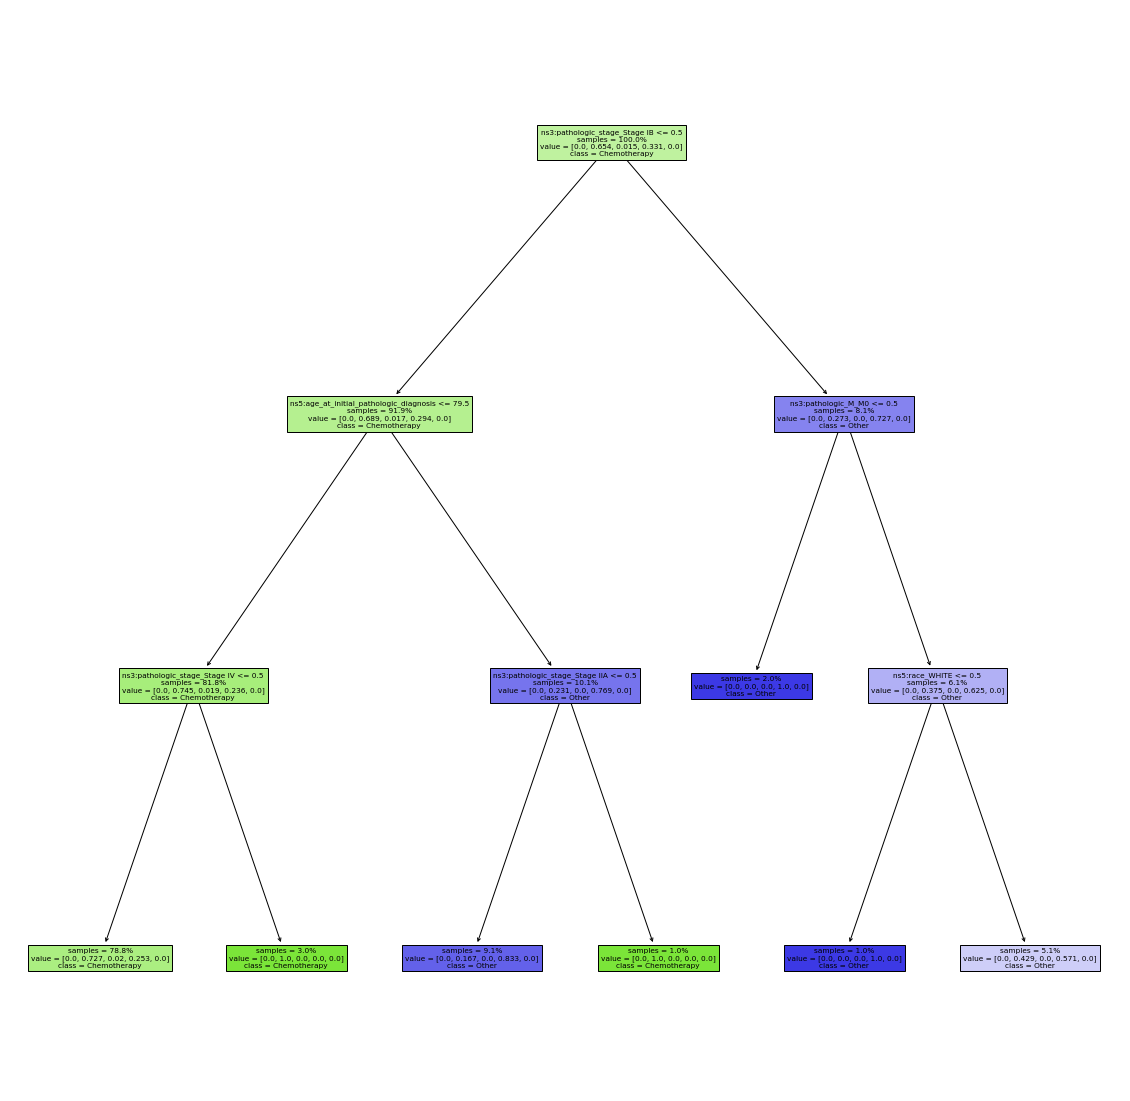

In [ ]:
# Visualizing the decision tree
fig = plt.figure(figsize=((20,20)))
plot_tree(rf.estimators_[0],
            feature_names = X_encoded.columns,
            class_names=['Ancillary', 'Chemotherapy', 'Hormone Therapy', 'Other', 'Vaccine'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

In [ ]:
# Explainability with SHAP (SHapley Additive exPlanations).
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required libraries
import shap

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_encoded)

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

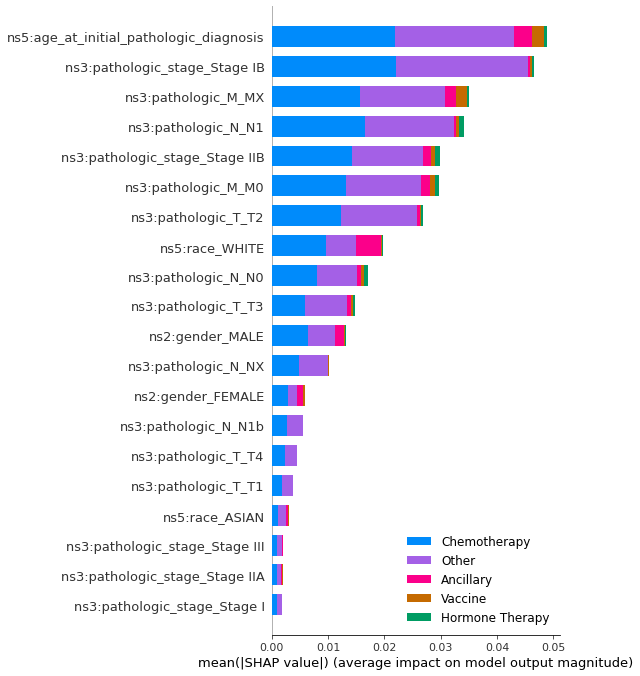

In [29]:
shap.summary_plot(shap_values, X_encoded, plot_type='bar', class_names=['Ancillary', 'Chemotherapy', 'Hormone Therapy', 'Other', 'Vaccine'])

In [ ]:
//TODO

# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction’s explanation
shap.force_plot(explainer.expected_value, shap_values[2,:], X.iloc[2,:])

In [ ]:
// TODO

# load JS visualization code to notebook
shap.initjs()
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_encoded)